# Import libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Next, I'll import all the Machine Learning algorithms I will be using.

K Neighbors Classifier 

Support Vector Classifier

Decision Tree Classifier

Random Forest Classifier

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import dataset

In [5]:
dataset = pd.read_csv('heart.csv')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Looks like the dataset has a total of 303 rows and there are no missing values. There are a total of 13 features along with one target value which we wish to find.

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Understanding the data

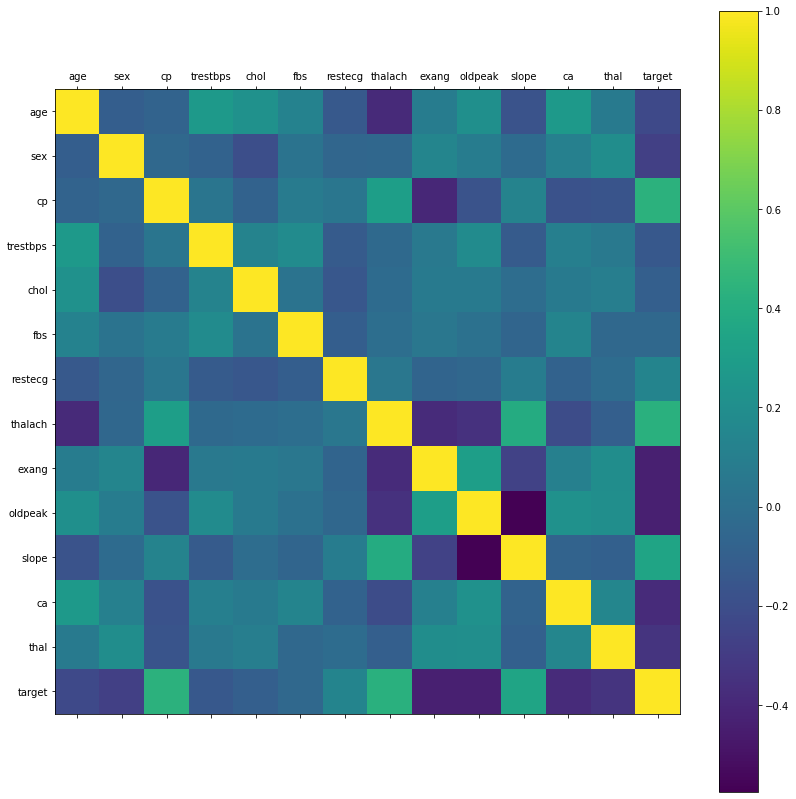

In [9]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

با نگاهی به ماتریس همبستگی بالا، به راحتی می توان دریافت که چند ویژگی با مقدار هدف همبستگی منفی دارند در حالی که برخی از آنها مثبت هستند. در مرحله بعد، هیستوگرام های هر متغیر را بررسی می کنم.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

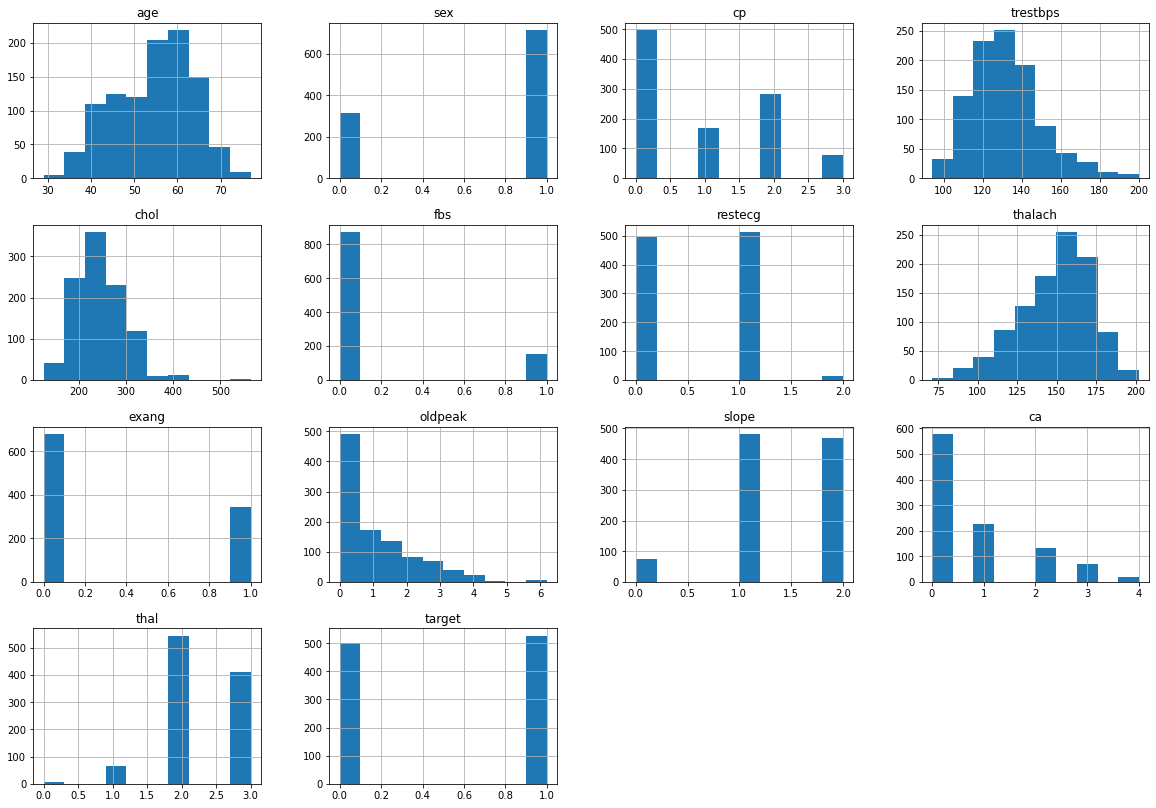

In [10]:
dataset.hist()

با نگاهی به هیستوگرام ‌های بالا , می‌توانم ببینم که هر ویژگی دارای طیف متفاوتی از توزیع است . بنابراین استفاده از مقیاس سازی قبل از پیش‌بینی ما باید بسیار مفید می تواند باشد . همچنین , ویژگی‌های طبقه‌بندی‌شده نیز هستند .

Text(0.5, 1.0, 'Count of each Target Class')

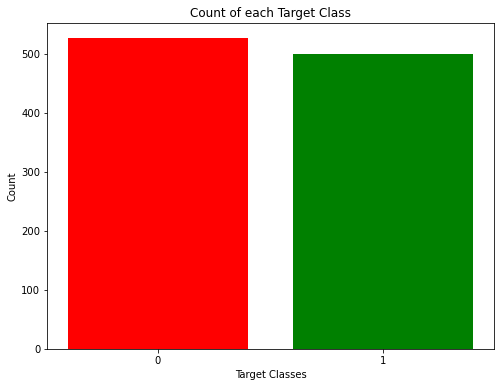

In [11]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.


# Data Processing

In [12]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   trestbps   1025 non-null   int64  
 2   chol       1025 non-null   int64  
 3   thalach    1025 non-null   int64  
 4   oldpeak    1025 non-null   float64
 5   target     1025 non-null   int64  
 6   sex_0      1025 non-null   uint8  
 7   sex_1      1025 non-null   uint8  
 8   cp_0       1025 non-null   uint8  
 9   cp_1       1025 non-null   uint8  
 10  cp_2       1025 non-null   uint8  
 11  cp_3       1025 non-null   uint8  
 12  fbs_0      1025 non-null   uint8  
 13  fbs_1      1025 non-null   uint8  
 14  restecg_0  1025 non-null   uint8  
 15  restecg_1  1025 non-null   uint8  
 16  restecg_2  1025 non-null   uint8  
 17  exang_0    1025 non-null   uint8  
 18  exang_1    1025 non-null   uint8  
 19  slope_0    1025 non-null   uint8  
 20  slope_1 

Now, I will use the StandardScaler from sklearn to scale my dataset.



In [14]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

# Machine Learning



In [15]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

# K Neighbors Classifier

In [16]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

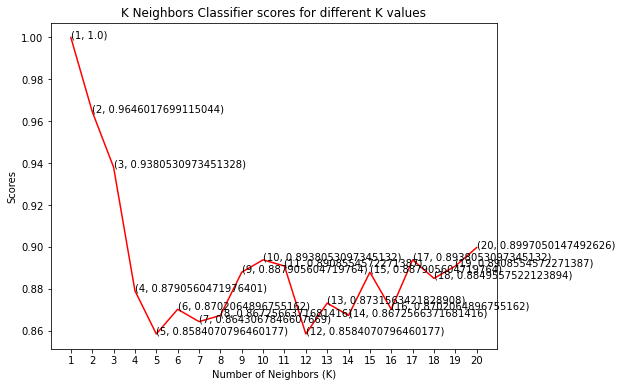

In [17]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [18]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[0]*100, 0))


The score for K Neighbors Classifier is 100.0% with 0 nieghbors.


## Save  Trained Machine Learning Models

In [19]:
import pickle
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, y_train)
# save the model to disk
filename = 'Knn_model.sav'
pickle.dump(knn_model, open(filename, 'wb'))

# some time later...

In [20]:
X_test.head(1)

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
807,-1.150673,-0.092055,-0.252098,1.299696,-0.571753,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0


In [21]:
print(loaded_model.predict(X_test.head(1))[0])

NameError: name 'loaded_model' is not defined

# Support Vector Classifier


In [22]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

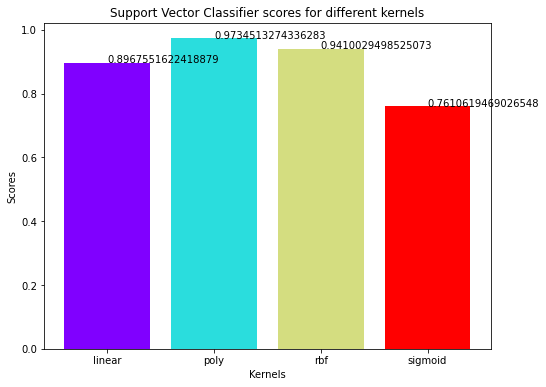

In [23]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

The linear kernel performed the best, being slightly better than rbf kernel.



In [24]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[1]*100, 'poly'))


The score for Support Vector Classifier is 97.34513274336283% with poly kernel.


In [25]:
SV_model = SVC(kernel = 'poly')
SV_model.fit(X_train, y_train)
#save the model to disk
filename = 'SV_model.sav'
pickle.dump(SV_model, open(filename, 'wb'))

# some time later...

# Decision Tree Classifier

In [26]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

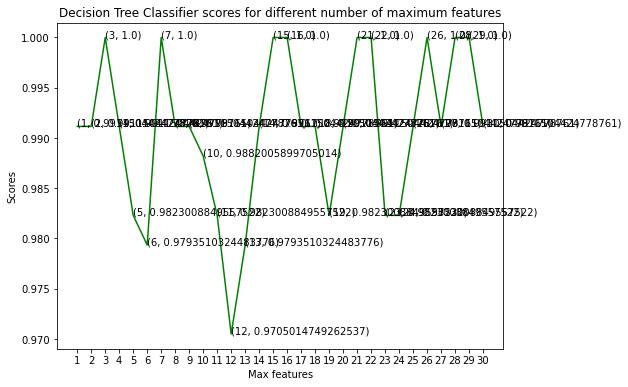

In [27]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [28]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[26]*100, [3,7,15,16,21,22,26,28,29]))


The score for Decision Tree Classifier is 99.11504424778761% with [3, 7, 15, 16, 21, 22, 26, 28, 29] maximum features.


In [29]:
DT_model = DecisionTreeClassifier(max_features = 3 , random_state = 0)
DT_model.fit(X_train, y_train)
#save the model to disk
filename = 'DT_model.sav'
pickle.dump(DT_model, open(filename, 'wb'))

# some time later...

# Random Forest Classifier

In [30]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

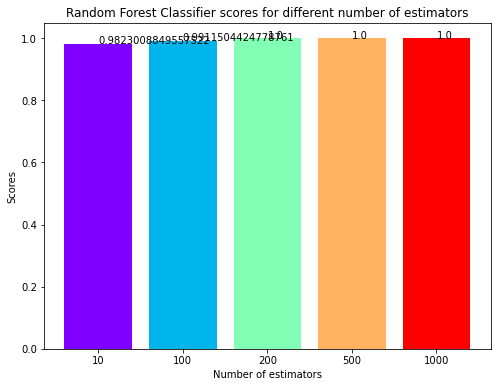

In [31]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [32]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[3]*100, [500, 1000]))

The score for Random Forest Classifier is 100.0% with [500, 1000] estimators.


In [33]:
RF_model = RandomForestClassifier(n_estimators = 500 , random_state = 0)
RF_model.fit(X_train, y_train)
#save the model to disk
filename = 'RF_model.sav'
pickle.dump(RF_model, open(filename, 'wb'))

# some time later...

# Conclusion

In [34]:
Comparison_dic = {'knn':knn_scores[0]*100,'svc':svc_scores[1]*100,'dt':dt_scores[17]*100,'rf':rf_scores[1]*100}
Comparison_dic.values()
Comparison_dic.keys()


dict_keys(['knn', 'svc', 'dt', 'rf'])

Text(0.5, 1.0, 'Comparison ')

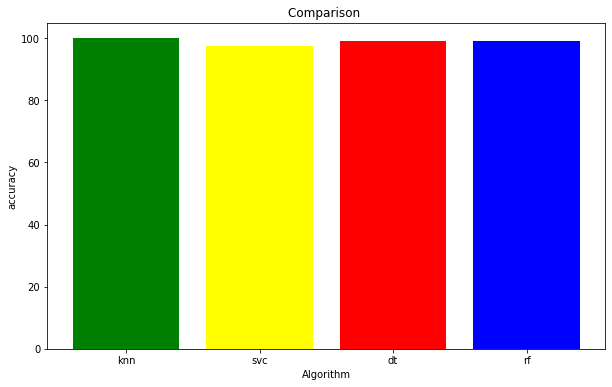

In [35]:
rcParams['figure.figsize'] = 10,6
plt.bar(Comparison_dic.keys(), Comparison_dic.values(),color = ['green', 'yellow','red','blue'])
plt.xticks([0,1,2,3])
plt.xlabel('Algorithm')
plt.ylabel('accuracy')
plt.title('Comparison ')